In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
import seaborn as sns

# Set style for plots
sns.set_style('whitegrid')
plt.rcParams['figure.figsize'] = (12, 8)

# Read the CSV file
df = pd.read_csv("MER_T03_07C.csv")

# Display the first few rows of the dataframe
df.head()

,MSN,YYYYMM,Value,Column_Order,Description,Unit
0,AVACPUS,194913,93.129,1,Aviation Gasoline Consumed by the Transportati...,Thousand Barrels per Day
1,AVACPUS,195013,108.266,1,Aviation Gasoline Consumed by the Transportati...,Thousand Barrels per Day
2,AVACPUS,195113,145.071,1,Aviation Gasoline Consumed by the Transportati...,Thousand Barrels per Day
3,AVACPUS,195213,169.391,1,Aviation Gasoline Consumed by the Transportati...,Thousand Barrels per Day
4,AVACPUS,195313,193.732,1,Aviation Gasoline Consumed by the Transportati...,Thousand Barrels per Day


# CLEAN THE DATA AND DISPLAY BARRELS OVER TIME

Cleaned dataframe:
          MSN  YYYYMM     Value  Column_Order  \
3524  MGACPUS  197301  5954.111             6   
3525  MGACPUS  197302  6264.477             6   
3526  MGACPUS  197303  6338.835             6   
3527  MGACPUS  197304  6366.571             6   
3528  MGACPUS  197305  6722.616             6   

                                            Description  \
3524  Motor Gasoline Consumed by the Transportation ...   
3525  Motor Gasoline Consumed by the Transportation ...   
3526  Motor Gasoline Consumed by the Transportation ...   
3527  Motor Gasoline Consumed by the Transportation ...   
3528  Motor Gasoline Consumed by the Transportation ...   

                          Unit       Date  Month  Year  
3524  Thousand Barrels per Day 1973-01-01      1  1973  
3525  Thousand Barrels per Day 1973-02-01      2  1973  
3526  Thousand Barrels per Day 1973-03-01      3  1973  
3527  Thousand Barrels per Day 1973-04-01      4  1973  
3528  Thousand Barrels per Day 1973-05-01     

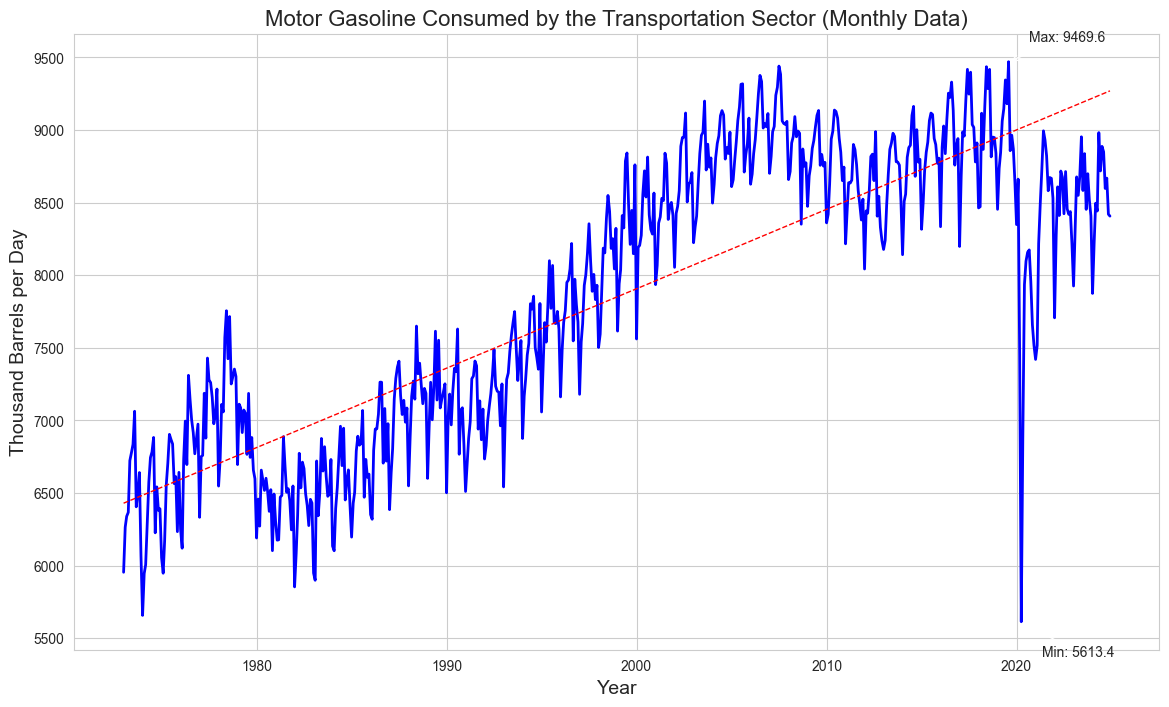

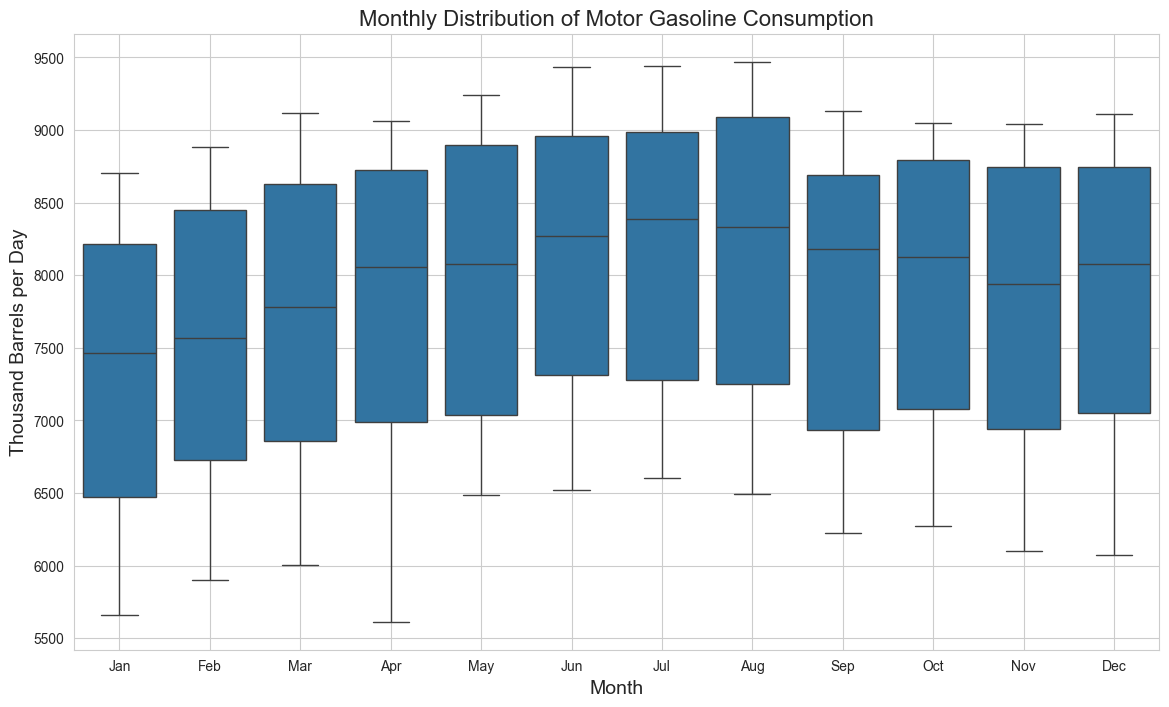

In [4]:
df = df[df['Description'] == "Motor Gasoline Consumed by the Transportation Sector"]
# CELL 1: CLEAN THE DATA AND DISPLAY BARRELS OVER TIME

# Convert YYYYMM to datetime
# First convert to string if it's not already
df['YYYYMM'] = df['YYYYMM'].astype(str)

# Extract year and month parts
def convert_date(yyyymm):
    # Handle both formats: integer (194913) and string ('194913')
    yyyymm_str = str(yyyymm)
    if len(yyyymm_str) >= 6:
        year = yyyymm_str[:-2]
        month = yyyymm_str[-2:]
        if month == '13':  # Special case for annual data
            month = '12'  # Treat as December for date conversion
        return f"{year}-{month}-01"
    else:
        return None

# Apply the date conversion
df['Date'] = pd.to_datetime(df['YYYYMM'].apply(convert_date), errors='coerce')

# Sort by date
df = df.sort_values('Date')

# Convert Value to numeric (just to be safe)
df['Value'] = pd.to_numeric(df['Value'], errors='coerce')

# Drop rows with missing values
df = df.dropna(subset=['Date', 'Value'])

# Remove annual summaries (month=13) for monthly analysis
df = df[~df['YYYYMM'].str.endswith('13')]

# Extract month number and year for seasonal analysis
df['Month'] = df['Date'].dt.month
df['Year'] = df['Date'].dt.year

# Display the cleaned dataframe
print("Cleaned dataframe:")
print(df.head())

# Create the visualization for barrels over time
plt.figure(figsize=(14, 8))
plt.plot(df['Date'], df['Value'], 'b-', linewidth=2)
plt.title('Motor Gasoline Consumed by the Transportation Sector (Monthly Data)', fontsize=16)
plt.xlabel('Year', fontsize=14)
plt.ylabel('Thousand Barrels per Day', fontsize=14)
plt.grid(True)

# Add a trend line
z = np.polyfit(range(len(df)), df['Value'], 1)
p = np.poly1d(z)
plt.plot(df['Date'], p(range(len(df))), "r--", linewidth=1)

# Annotate some key points
# Find the maximum and minimum points
max_idx = df['Value'].idxmax()
min_idx = df['Value'].idxmin()
plt.annotate(f'Max: {df.loc[max_idx, "Value"]:.1f}',
             xy=(df.loc[max_idx, 'Date'], df.loc[max_idx, 'Value']),
             xytext=(15, 15), textcoords='offset points',
             arrowprops=dict(arrowstyle='->'))

plt.annotate(f'Min: {df.loc[min_idx, "Value"]:.1f}',
             xy=(df.loc[min_idx, 'Date'], df.loc[min_idx, 'Value']),
             xytext=(15, -25), textcoords='offset points',
             arrowprops=dict(arrowstyle='->'))

plt.savefig('gasoline_consumption_time_series.png')
plt.show()

# Visualize monthly seasonal patterns
plt.figure(figsize=(14, 8))
sns.boxplot(x='Month', y='Value', data=df)
plt.title('Monthly Distribution of Motor Gasoline Consumption', fontsize=16)
plt.xlabel('Month', fontsize=14)
plt.ylabel('Thousand Barrels per Day', fontsize=14)
plt.xticks(range(12), ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
plt.grid(True)
plt.savefig('monthly_patterns.png')
plt.show()

# POLYNOMIAL REGRESSION TO PREDICT MONTHLY MOTOR GASOLINE CONSUMPTION

Month columns created: ['month_1', 'month_2', 'month_3', 'month_4', 'month_5', 'month_6', 'month_7', 'month_8', 'month_9', 'month_10', 'month_11', 'month_12']
Polynomial features shape: (624, 3)
Combined features shape: (624, 15)
Model coefficients shape: (15,)
R² score: 0.8916


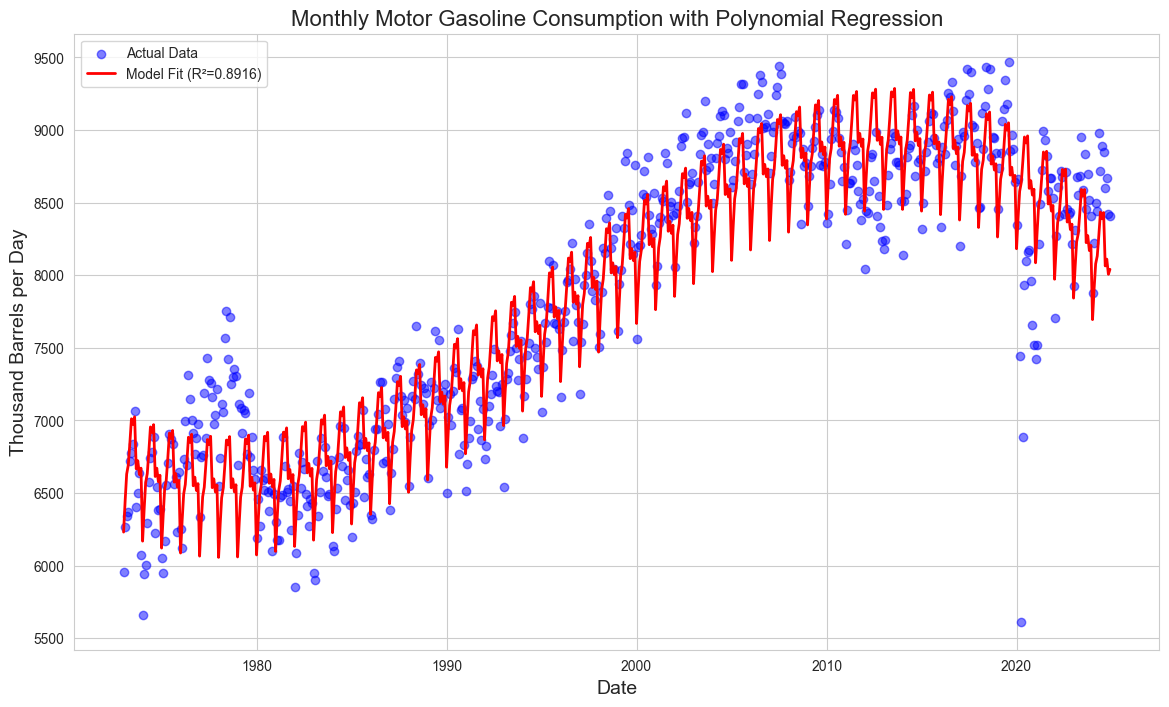

Future features shape: (24, 15)


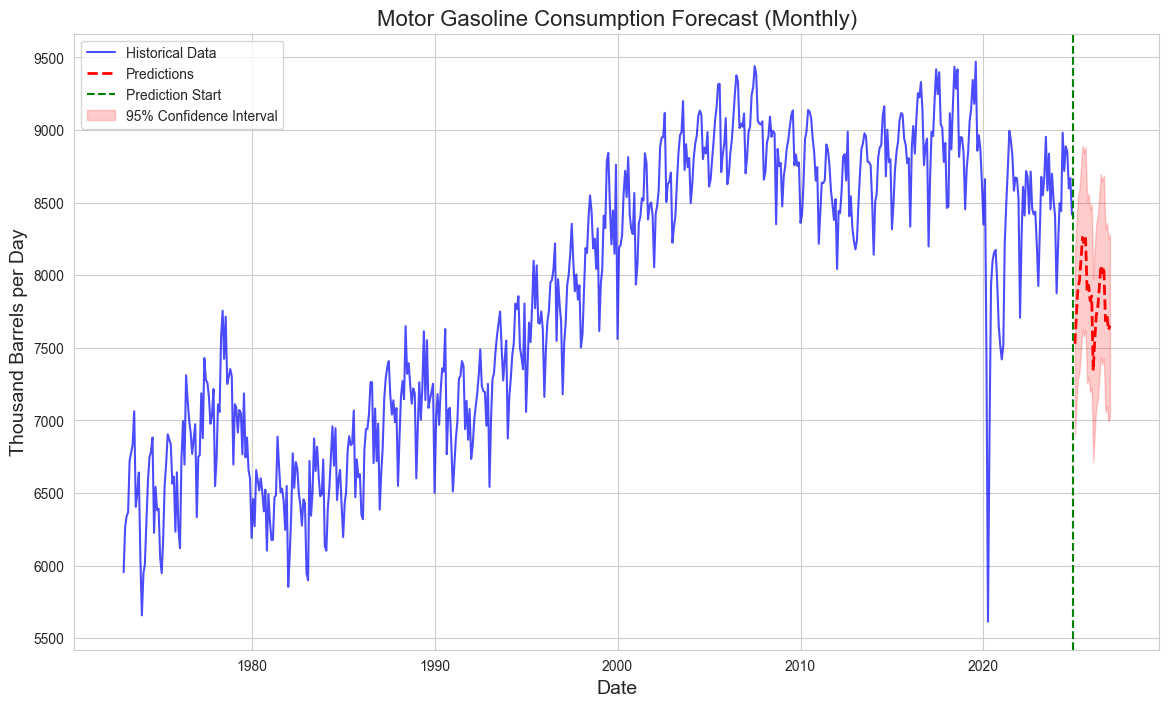


Predicted Monthly Motor Gasoline Consumption (Thousand Barrels per Day):
2025-01 (January): 7527.43 thousand barrels/day
2025-02 (February): 7741.57 thousand barrels/day
2025-03 (March): 7908.63 thousand barrels/day
2025-04 (April): 7961.00 thousand barrels/day
2025-05 (May): 8100.07 thousand barrels/day
2025-06 (June): 8260.39 thousand barrels/day
2025-07 (July): 8212.14 thousand barrels/day
2025-08 (August): 8253.14 thousand barrels/day
2025-09 (September): 7884.44 thousand barrels/day
2025-10 (October): 7929.67 thousand barrels/day
2025-11 (November): 7823.52 thousand barrels/day
2025-12 (December): 7856.02 thousand barrels/day
2026-01 (January): 7341.95 thousand barrels/day
2026-02 (February): 7554.47 thousand barrels/day
2026-03 (March): 7719.91 thousand barrels/day
2026-04 (April): 7770.65 thousand barrels/day
2026-05 (May): 7908.09 thousand barrels/day
2026-06 (June): 8066.77 thousand barrels/day
2026-07 (July): 8016.87 thousand barrels/day
2026-08 (August): 8056.23 thousand ba

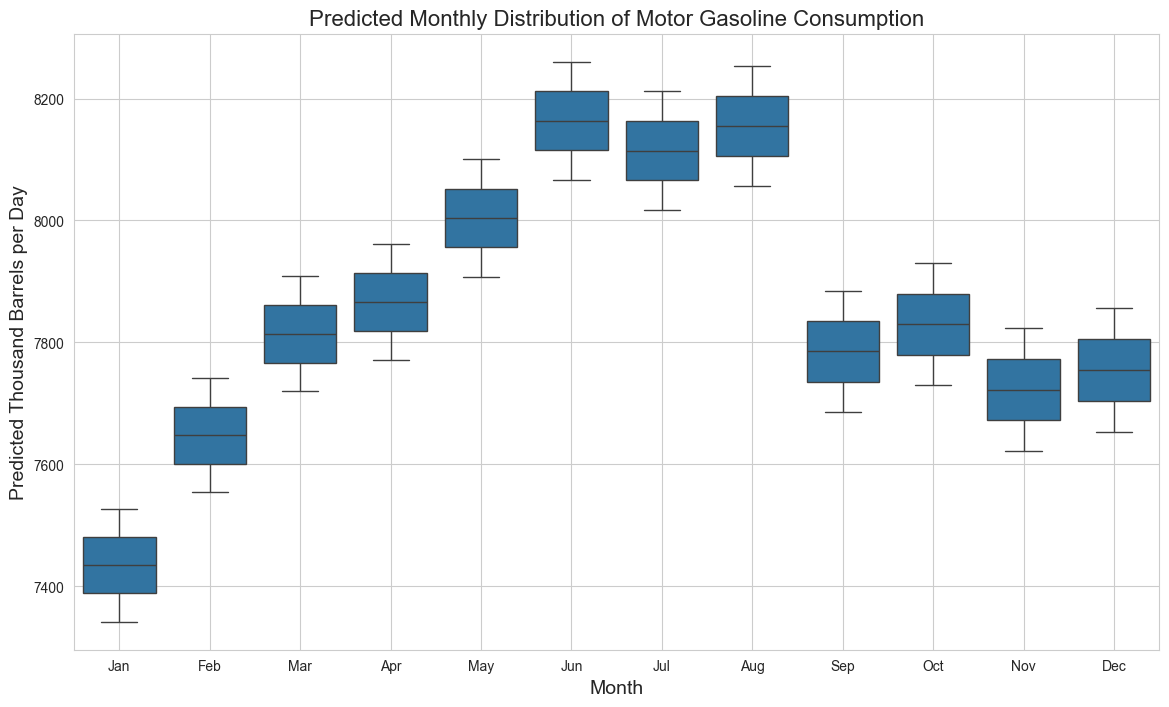

In [6]:
# Create a continuous time index for the regression
df['TimeIndex'] = range(len(df))

# Prepare the data for regression
X = np.array(df['TimeIndex']).reshape(-1, 1)
y = df['Value'].values

# Create monthly seasonal features (one-hot encoding)
df_with_dummies = pd.get_dummies(df['Month'], prefix='month', drop_first=False)
month_columns = df_with_dummies.columns.tolist()
print(f"Month columns created: {month_columns}")

# Choose the best polynomial degree
degree = 3  # Based on previous testing, cubic polynomials work well for this type of data

# Create the polynomial features transformer
poly = PolynomialFeatures(degree=degree, include_bias=False)
X_poly = poly.fit_transform(X)
print(f"Polynomial features shape: {X_poly.shape}")

# Combine polynomial features with month dummies
X_combined = np.hstack([X_poly, df_with_dummies.values])
print(f"Combined features shape: {X_combined.shape}")

# Train the model
model = LinearRegression()
model.fit(X_combined, y)
print(f"Model coefficients shape: {model.coef_.shape}")

# Get model predictions on training data
y_pred = model.predict(X_combined)
r2 = r2_score(y, y_pred)
print(f"R² score: {r2:.4f}")

# Plot model performance
plt.figure(figsize=(14, 8))
plt.scatter(df['Date'], df['Value'], color='blue', alpha=0.5, label='Actual Data')
plt.plot(df['Date'], y_pred, color='red', linewidth=2, label=f'Model Fit (R²={r2:.4f})')
plt.title('Monthly Motor Gasoline Consumption with Polynomial Regression', fontsize=16)
plt.xlabel('Date', fontsize=14)
plt.ylabel('Thousand Barrels per Day', fontsize=14)
plt.legend()
plt.grid(True)
plt.savefig('model_performance.png')
plt.show()

# Now make predictions for future months
num_future_months = 24  # Predict 2 years into the future
last_date = df['Date'].max()
last_idx = df['TimeIndex'].max()

# Generate future dates
future_dates = [last_date + pd.DateOffset(months=i+1) for i in range(num_future_months)]
future_months = [date.month for date in future_dates]

# Create future time indices
future_indices = np.array(range(last_idx + 1, last_idx + 1 + num_future_months)).reshape(-1, 1)

# Create future polynomial features
future_poly = poly.transform(future_indices)

# Create month dummies for future dates
future_dummies = pd.get_dummies(future_months, prefix='month', drop_first=False)

# Make sure the columns match the original dummies
for col in month_columns:
    if col not in future_dummies.columns:
        future_dummies[col] = 0
future_dummies = future_dummies[month_columns]  # Reorder columns to match

# Combine features
future_X_combined = np.hstack([future_poly, future_dummies.values])
print(f"Future features shape: {future_X_combined.shape}")

# Make predictions
future_predictions = model.predict(future_X_combined)

# Create a dataframe with predictions
future_df = pd.DataFrame({
    'Date': future_dates,
    'Prediction': future_predictions,
    'Month': future_months,
    'Year': [date.year for date in future_dates]
})

# Visualize the predictions
plt.figure(figsize=(14, 8))
plt.plot(df['Date'], df['Value'], 'b-', alpha=0.7, label='Historical Data')
plt.plot(future_df['Date'], future_df['Prediction'], 'r--', linewidth=2, label='Predictions')

# Add vertical line at the prediction start
plt.axvline(x=last_date, color='green', linestyle='--', label='Prediction Start')

# Calculate residuals for confidence intervals
residuals = y - y_pred
residual_std = np.std(residuals)

# Add confidence intervals 
plt.fill_between(
    future_df['Date'],
    future_df['Prediction'] - 1.96 * residual_std,
    future_df['Prediction'] + 1.96 * residual_std,
    color='red', alpha=0.2, label='95% Confidence Interval'
)

plt.title('Motor Gasoline Consumption Forecast (Monthly)', fontsize=16)
plt.xlabel('Date', fontsize=14)
plt.ylabel('Thousand Barrels per Day', fontsize=14)
plt.legend()
plt.grid(True)
plt.savefig('monthly_forecast.png')
plt.show()

# Print future predictions by month and year
print("\nPredicted Monthly Motor Gasoline Consumption (Thousand Barrels per Day):")
for _, row in future_df.iterrows():
    month_name = pd.to_datetime(f"2023-{row['Month']}-01").strftime('%B')
    print(f"{row['Date'].strftime('%Y-%m')} ({month_name}): {row['Prediction']:.2f} thousand barrels/day")

# Show seasonal patterns in predictions by month
plt.figure(figsize=(14, 8))
sns.boxplot(x='Month', y='Prediction', data=future_df)
plt.title('Predicted Monthly Distribution of Motor Gasoline Consumption', fontsize=16)
plt.xlabel('Month', fontsize=14)
plt.ylabel('Predicted Thousand Barrels per Day', fontsize=14)
plt.xticks(range(12), ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
plt.grid(True)
plt.savefig('predicted_monthly_patterns.png')
plt.show()